## Hello Seaborn (+ Matplotlib & Pandas)

Dieses Notebook wurde über ein Conda Environment mithilfe von folgenden Modulen erstellt:
* [Numpy](https://anaconda.org/anaconda/numpy)
* [Pandas](https://anaconda.org/anaconda/pandas)
* [Seaborn](https://anaconda.org/anaconda/seaborn)
* [Matplotlib](https://anaconda.org/anaconda/matplotlib)

Das ganze soll nur als eine kleine Einführung in die Welt des Data Plotting (mit Matplotlib, Seaborn, Pandas) dienen. Es gibt selbstredend wesentlich mehr Arten von Graphen.

Für weitere Hilfen, oder Beispiele, gibt es die:
* [Dokumentation Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Dokumentation Seaborn](https://seaborn.pydata.org/examples/index.html)
* [Dokumentation Matplotlib](https://matplotlib.org/3.2.1/contents.html)

Bei sonstigen Fragen stehe ich (Long) euch gerne zur Verfügung.

In [1]:
import numpy as np # Importieren für lineare Algebra
import pandas as pd # Importieren, um Daten von der .csv zu importieren und zu verarbeiten
import seaborn as sns # Importieren, um Daten mithilfe von Seaborn visualisieren zu können
import matplotlib.pyplot as plt # Importieren, da Seaborn auf Matplotlib aufbaut

In [2]:
"""
Hier setzen wir den Grafikstil auf "darkgrid".
By default bringt Seaborn folgende Themes mit:
- darkgrid
- whitegrid
- dark
- white
- ticks

Referenz:
https://seaborn.pydata.org/tutorial/aesthetics.html
"""
sns.set(style = "darkgrid")

In [3]:
"""
Hier nutzen wir Pandas (als pd), um die .csv-Datei mit den Iris-Daten (Iris.csv) auszulesen.

Referenz:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
"""
iris = pd.read_csv('./Iris.csv')

In [4]:
# Gibt die ersten 10 Zeilen des Dataframes aus der .csv-Datei zurück
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Spalte 'Id' entfernen (ist irrelevant für Analyse)
iris.drop('Id',axis=1,inplace=True)

In [6]:
# Grundlegende Informationen zum Dataframe ausgeben (z. B. zur Überprüfung von fehlenden Werten)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Wie viele Pflanzen gibt es pro Spezies
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

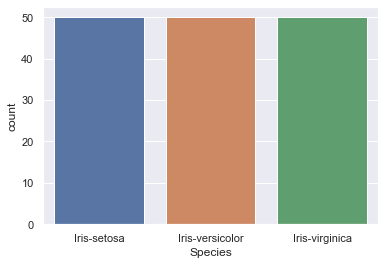

In [8]:
"""
Ein "Count-Plot" entspricht einem Histogramm für einen bestimmten kategorialen Bereich.
Es zeigt einfach die Anzahl der Vorkommnisse eines Items, basierend auf einem bestimmten Kategorietyp.

Referenz:
https://seaborn.pydata.org/generated/seaborn.countplot.html
"""
sns.countplot('Species', # Kategorie
              data=iris) # Datensatz, der verwendet wird
plt.show() # Graph anzeigen lassen

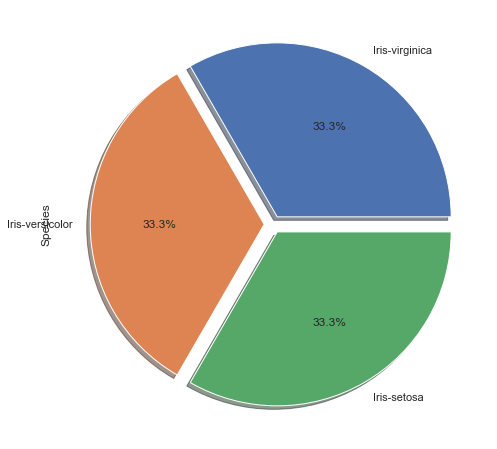

In [9]:
"""
Eine weitere Methode diese Daten darzustellen, wäre das Kreis- / Tortendiagramm

Referenz (hier mal Matplotlib):
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
"""
iris['Species'].value_counts().plot.pie(explode=[.05, .05, .05], # Abstand der Kreisabschnitte
                                        autopct='%1.1f%%', # Label der einzelnen Abschnitte
                                        shadow=True, # Schatteneffekt
                                        figsize=(10,8)) # Größe des Graphen
plt.show() # Graph anzeigen lassen

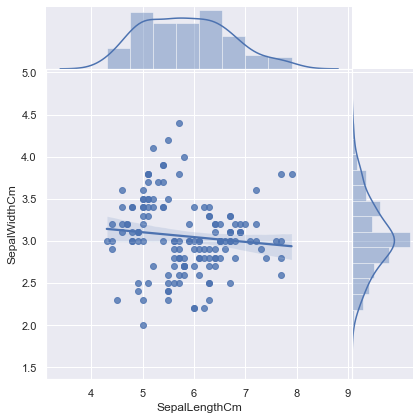

In [10]:
"""
Joint-Plot ist Seaborn-spezifisch und wird verwendet, um:
- die Beziehung zwischen 2 Variablen zu visualisieren/analysieren (bivariat)
- individuelle Verteilungen im selben Graphen zu beschreiben (univariat)

Referenz:
https://seaborn.pydata.org/generated/seaborn.jointplot.html
"""
fig = sns.jointplot("SepalLengthCm", # x-Daten
                    "SepalWidthCm", # y-Daten
                    data=iris, # Datensatz, der verwendet wird
                    kind="reg", # Art des Graphen (hier reg, bzw. Regression)
                    color='b', # Farbe des Graphen
                    space=0) # Abstand vom Rand des Graphen

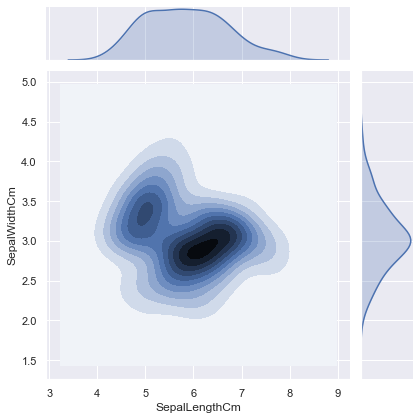

In [11]:
"""
Eine weitere Möglichkeit des Joint-Plots
"""
fig = sns.jointplot("SepalLengthCm", # x-Daten
                    "SepalWidthCm", # y-Daten
                    data=iris, # Datensatz, der verwendet wird
                    kind="kde") # Art des Graphen (hier kde, bzw. Kernel Density Estimation)

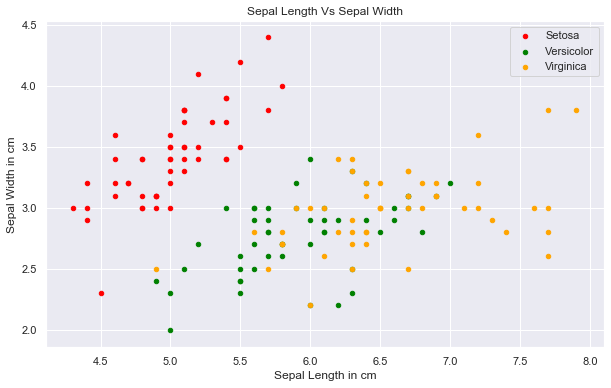

In [12]:
"""
Scatter-Plots (dt. Streudiagramm) stellen die Beziehung zwischen zwei NUMERISCHEN Variablen dar,
wobei jedes Element als Punkt (x, y) dargestellt wird.

In diesem Beispiel wird direkt mit der .plot-Erweiterung von Pandas geplottet.

Referenz:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
"""
sc = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', # Art des Graphen
                                            x='SepalLengthCm', # Daten für x
                                            y='SepalWidthCm', # Daten für y
                                            color='red', # Farbe der Spezies
                                            label='Setosa') # Name für die Legende
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', # Art des Graphen
                                           x='SepalLengthCm', # Daten für x
                                           y='SepalWidthCm', # Daten für y
                                           color='green', # Farbe der Spezies
                                           label='Versicolor', # Name für die Legende
                                           ax=sc) # Übernahme der Achsen vom ersten Graphen
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', # Art des Graphen
                                          x='SepalLengthCm', # Daten für x
                                          y='SepalWidthCm', # Daten für y
                                          color='orange', # Farbe der Spezies
                                          label='Virginica', # Name für die Legende
                                          ax=sc) # Übernahme der Achsen vom ersten Graphen
sc.set_xlabel('Sepal Length in cm') # Label der x-Achse
sc.set_ylabel('Sepal Width in cm') # Label der y-Achse
sc.set_title('Sepal Length Vs Sepal Width') # Label des gesamten Graphen
sc = plt.gcf() # gcf = get current figure
sc.set_size_inches(10,6) # Größe der Abbildung (width, height)

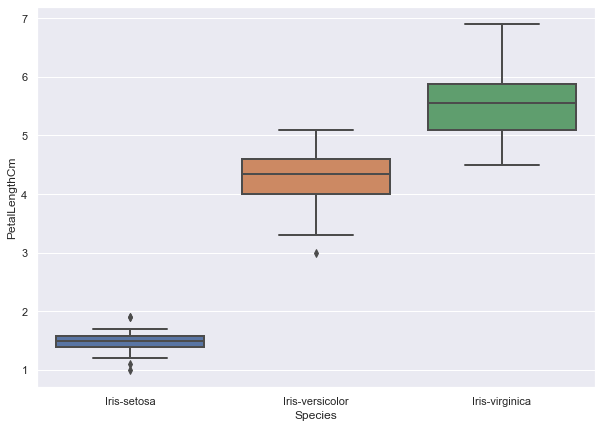

In [13]:
"""
Der Box-Plot, bzw. Box-Whisker-Plot, gibt eine gute statische Zusammenfassung der Merkmale, wobei:
- die obere Linie für den Maximalwert steht
- die obere Kante des Kastens für das 3. Quartil steht
- die mittlere Kante des Kastens für das 2. Quartil steht
- die untere Kante des Kastens für das 1. Quartil steht
- die unterste Linie für den Minimalwert des Merkmals steht
- die schwarzen Punkte für Ausreißer stehen
Die Höhe des Kastens wird auch als Interquartilbereich bezeichnet.

Referenz:
https://seaborn.pydata.org/generated/seaborn.boxplot.html
"""
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(10,7) # Größe der Abbildung (width, height)
fig = sns.boxplot(x='Species', # Daten für x
                  y='PetalLengthCm', # Daten für y
                  data=iris, # Datensatz, der verwendet wird
                  order=['Iris-setosa','Iris-versicolor','Iris-virginica'], # Reihenfolge auf x
                  linewidth=2, # Liniendicke im Graphen
                  orient='v') # Orientierung des Graphen (v = vertikal)

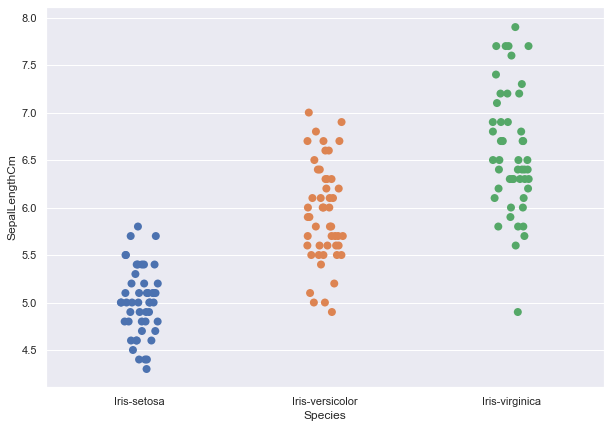

In [14]:
"""
Ein Strip-Plot ist eine Art Streudiagramm, in dem eine Variable kategorial ist.

Referenz:
https://seaborn.pydata.org/generated/seaborn.stripplot.html
"""
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(10,7) # Größe der Abbildung (width, height)
fig = sns.stripplot(x='Species', # Daten für x
                    y='SepalLengthCm', # Daten für y
                    data=iris, # Datensatz, der verwendet wird
                    jitter=True, # Hinzufügen, um Überlappung der Punkte zu verringern
                    edgecolor='grey', # Linienfarbe um jeden Punkt
                    size=8, # Radius der Punkte
                    orient='v') # Orientierung des Graphen (v = vertikal)

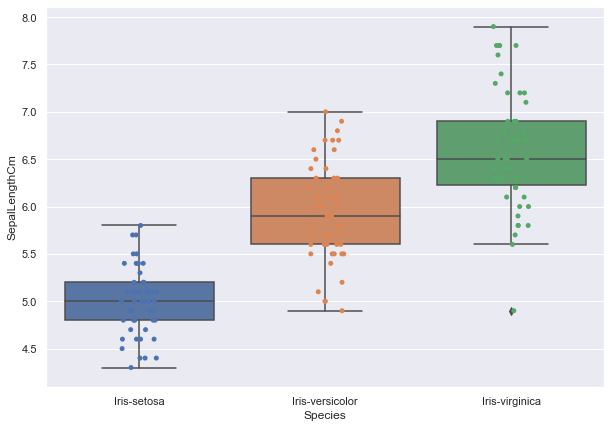

In [15]:
"""
Diese Graphen lassen sich auch beliebig für einen groben Überblick kombinieren
hier: Box-Plot + Strip-Plot
"""
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(10,7) # Größe der Abbildung (width, height)
fig = sns.boxplot(x='Species', # Daten für x
                  y='SepalLengthCm', # Daten für y
                  data=iris) # Datensatz, der verwendet wird
fig = sns.stripplot(x='Species', # Daten für x
                    y='SepalLengthCm', # Daten für y
                    data=iris, # Datensatz, der verwendet wird
                    jitter=True, # Hinzufügen, um Überlappung der Punkte zu verringern
                    edgecolor='gray') # Linienfarbe um jeden Punkt

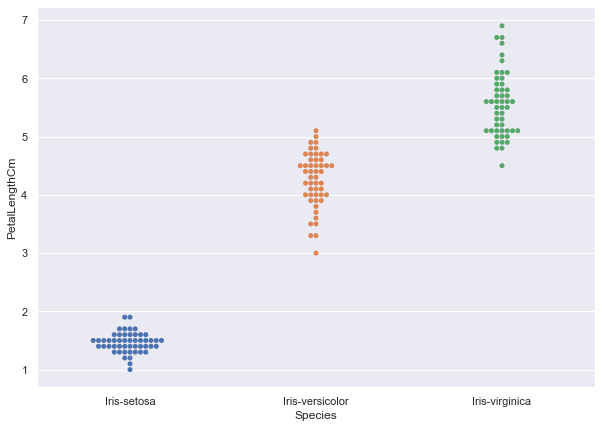

In [16]:
"""
Eine übersichtlichere Alternative zu Strip-Plots, sind Swarm-Plots (kommt vom Bienenschwarm)
Der Vorteil hiervon ist, dass jeder Datenpunkt deutlich sichtbar ist und nichts verdeckt wird.

Referenz:
https://seaborn.pydata.org/generated/seaborn.swarmplot.html
"""
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(10,7) # Größe der Abbildung (width, height)
fig = sns.swarmplot(x="Species", # Daten für x
                    y="PetalLengthCm", # Daten für y
                    data=iris) # Datensatz, der verwendet wird

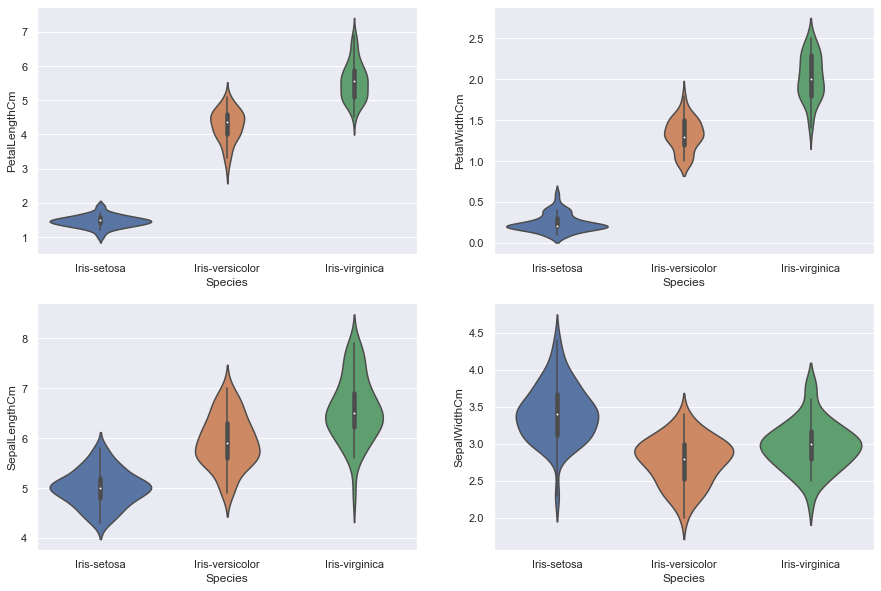

In [17]:
"""
Violin-Plot ist Seaborn-spezifisch und eine Kombination aus einem Box-Plot + Density-Plot,
welcher gedreht und auf jeder Seite platziert wird, um die Verteilungsform der Daten anzuzeigen.
Hierbei stellt: 
- der dicke schwarze Balken in der Mitte den Interquartilbereich dar 
- die dünne schwarze Linie, die davon ausgeht, die 95%-Konfidenzintervalle dar
- der weiße Punkt den Median dar
Das ganze stellt eine Erweiterung des Box-Plots dar.

Referenz:
https://seaborn.pydata.org/generated/seaborn.violinplot.html

Subplots (mehrere Diagramme in einem gesamten Diagramm):
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html
"""

plt.figure(figsize=(15,10)) # Größe (width, height)
plt.subplot(2,2,1) # erster Teilgraph für das erste Merkmal
sns.violinplot(x='Species', # Daten für x
               y='PetalLengthCm', # Daten für y
               data=iris) # Datensatz, der verwendet wird
plt.subplot(2,2,2) # zweiter Teilgraph für das zweite Merkmal
sns.violinplot(x='Species', # Daten für x
               y='PetalWidthCm', # Daten für y
               data=iris) # Datensatz, der verwendet wird
plt.subplot(2,2,3) # dritter Teilgraph für das dritte Merkmal
sns.violinplot(x='Species', # Daten für x
               y='SepalLengthCm', # Daten für y
               data=iris) # Datensatz, der verwendet wird
plt.subplot(2,2,4) # vierter Teilgraph für das vierte Merkmal
sns.violinplot(x='Species', # Daten für x
               y='SepalWidthCm', # Daten für y
               data=iris) # Datensatz, der verwendet wird

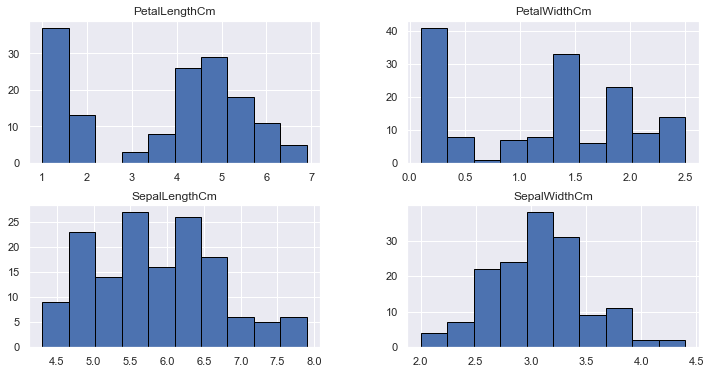

In [18]:
"""
Natürlich darf auch hier das einfache Histogramm nicht fehlen,
welches das Vorkommen der einzelnen Ausprägungen visualisiert. (zur Übersicht)
In diesem Beispiel wird mit der .hist-Erweiterung von Pandas geplottet.

Referenz:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
"""
iris.hist(edgecolor='black', # Umrandungsfarbe
          linewidth=1) # Dicke der Linie
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(12,6) # Größe der Abbildung (width, height)

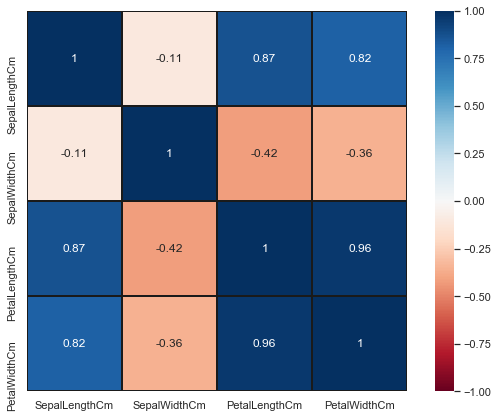

In [19]:
"""
Die Heatmap wird verwendet, um die Korrelation zwischen den Merkmalen im Datensatz zu ermitteln.
Ein hoher positiver oder negativer Wert zeigt, dass die Merkmale eine hohe Korrelation aufweisen.
Dies ist hilfreich für die Auswahl der Parameter für das maschinelle Lernen.

Die Seaborn Heatmap ist hierbei im Python-Ecosystem die intuitivste.
In diesem Beispiel wird zunächst mit Pandas die Korrelationsmatrix ermittelt, 
welche dann mit Seaborn dargestellt wird.

Referenz:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

Pandas Korrelationsmatrix:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
"""
fig = plt.gcf() # gcf = get current figure
fig.set_size_inches(10,7) # Größe der Abbildung (width, height)
fig = sns.heatmap(iris.corr(), # Erstellen der Korrelationsmatrix aus dem Dataframe
                  annot=True, # Werte in einzelnen Zellen anzeigen
                  cmap='RdBu', # Farbpalette (colormap)
                  linewidths=1, # Dicke der Trennlinien
                  linecolor='k', # Farbe der Trennlinien
                  square=True, # Quadratische Form
                  mask=False, # Wenn True, werden Daten ausgeblendet
                  vmin=-1, # Niedrigster Wert
                  vmax=1, # Höchster Wert
                  cbar_kws={"orientation": "vertical"}, # Orientierung des Graphen (v = vertikal)
                  cbar=True) # Colorbar anzeigen

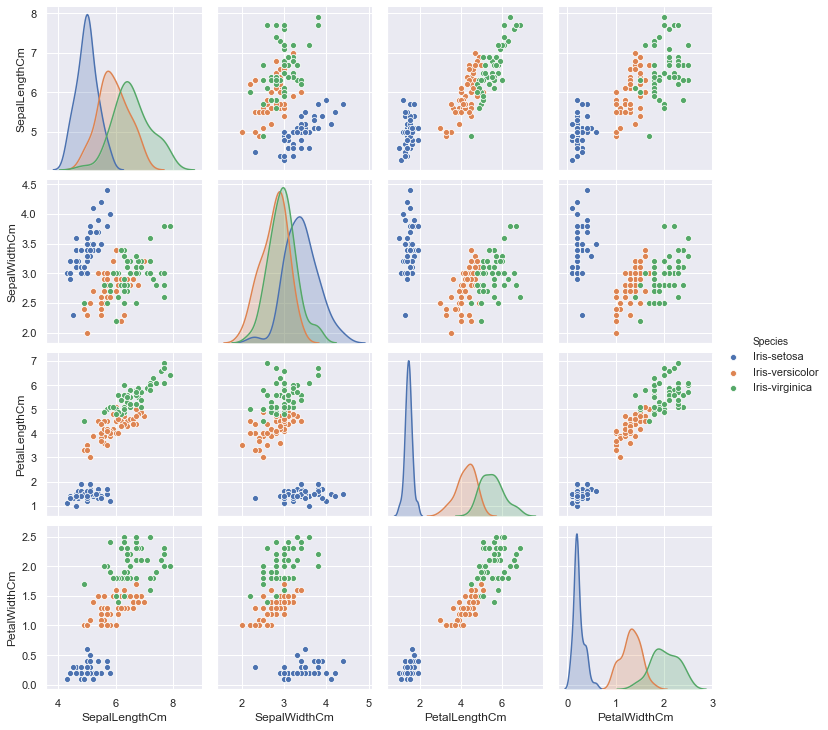

In [20]:
"""
Ein Pair-Plot ist auch als Streudiagramm bekannt, 
bei dem eine Variable in derselben Datenzeile
mit dem Wert einer anderen Variable (paarweise) verglichen wird.

Referenz:
https://seaborn.pydata.org/generated/seaborn.pairplot.html
"""
fig = sns.pairplot(iris, # Datensatz aus Dataframe (Pandas)
                   hue='Species') # Farbe

## Schlusswort

Danke für das Durcharbeiten meiner kleinen Übersicht. Ich hoffe, ich habe euch damit einen kleinen Einblick in die Welt der Datenvisualisierung in Python geben können. Am besten ihr probiert euch an eigenen Beispielen aus, denn nur Übung macht den Meister.